<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

<h1>Data Loading & Exploration </h1>

<h3>1.Import necessary libraries. </h3>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc

<h3>2.Display the first five rows and last five rows of the dataframe.</h3>

In [ ]:
df=pd.read_csv('marketing_data.csv')

In [ ]:
df.head(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.tail(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


<h3>3.Check the shape of the data (number of rows and column) . Check the general information about the dataframe using .info() method.
</h3>

In [ ]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)




Shape of the dataset (2240, 28)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVis

- From the above information we can see, there are some categorical column like Country,Dt_Customer,Income,Education,Marital_Status
- We will do some hack to convert them into numerical variables.
- It seems like there is no missing values. Let's verify it by checking the percentage of each column.

<h3>4.Check the percentage of missing values of the dataframe. Drop the missing values if there are any</h1>

In [ ]:
def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64


- We can see none of the column has missing values except Income column.
- As it is only 1% in the "Income" column, we will drop all the missing values column.

In [ ]:
df.dropna(inplace=True)
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
 Income                0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Response               0.0
Complain               0.0
Country                0.0
dtype: float64


- We have removed all the missing values from all the columns.

<h3>5.Check if there are any duplicate rows. </h3>

In [ ]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


- We don't have any duplicate rows, which is a good thing. We are good to go.

<h3>6.Remove the extra spaces in the ‘Income’ column name. </h3>

- There are spaces in the column names. First let's remove the unnecessary spaces from the column names and then we will convert the Income column.

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
def remove_space(df):
    '''function to remove spaces from the name of columns'''
    df.columns = df.columns.str.replace(' ', '') 
    return df

df=remove_space(df)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

- Now, we have successfully remove all the spaces from the column names.

<h3>7.Check the dtype of values in column 'Income'.Convert the values in 'Income' column to numeric format.</h3>


In [ ]:
def map_income(x):
    try:
        x = x.strip('$')
        x = re.sub(',','',x)
        return float(x)
    except:
        return np.nan

df['Income'] = df['Income'].map(map_income)

In [ ]:
basic_info(df)
print("*"*40)
df.head(n=6)

Shape of the dataset (2216, 28)
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2216 non-null int64
Year_Birth             2216 non-null int64
Education              2216 non-null object
Marital_Status         2216 non-null object
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Dt_Customer            2216 non-null object
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVi

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP


<h1>EDA & Basic Statistical Analysis </h1>

<h3>8.Check the basic statistics of the data-frame using describe() method.</h3>

In [ ]:
def basic_statistics(df):
    return df.describe().T

basic_statistics(df)

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


<h3>9.Write a function which will take the data frame as input and will plot a bar plot which represents the percentage of distribution of each label of ‘Education’ column.</h3>

            Education  Frequency_Percentage
Graduation       1116                 93.00
PhD               481                 40.08
Master            365                 30.42
2n Cycle          200                 16.67
Basic              54                  4.50


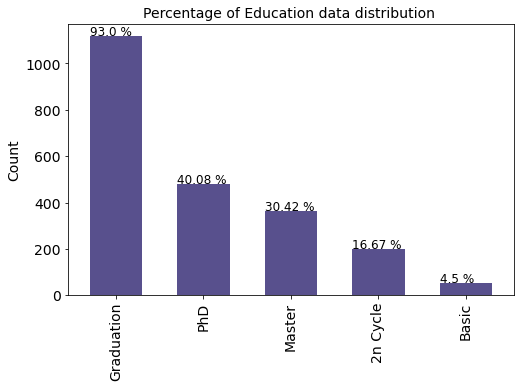

In [ ]:
def percentage_education(df):
    '''This function will return the percentage information regarding Educational background of each customer'''
    df=df.copy(deep=True)
    ed_data=pd.DataFrame(df['Education'].value_counts())
    ed_data['Frequency_Percentage']=[round(i/ed_data['Education'].sum(),2) for i in ed_data['Education']]
    print(ed_data)
    ax = df['Education'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#58508d'],fontsize=14, width=0.6)
    ax.set_title('Percentage of Education data distribution ',fontsize=14)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/221600,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    

percentage_education(df)

<h3>10.Write a function which will take the data frame as input and will plot a bar plot which represents the percentage of distribution of each label of ‘Country’ column.</h3>

     Country  Frequency_Percentage
SP      1093                 91.08
SA       337                 28.08
CA       266                 22.17
AUS      147                 12.25
IND      147                 12.25
GER      116                  9.67
US       107                  8.92
ME         3                  0.25


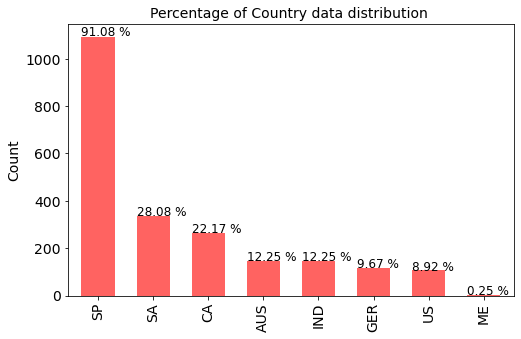

In [ ]:
def percentage_country(df):
    df=df.copy(deep=True)
    cu_data=pd.DataFrame(df['Country'].value_counts())
    cu_data['Frequency_Percentage']=[round(i/cu_data['Country'].sum(),2) for i in cu_data['Country']]
    print(cu_data)
    ax = df['Country'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#ff6361'],fontsize=14, width=0.6)

    ax.set_title('Percentage of Country data distribution ',fontsize=14)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/221600,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    
    
    
percentage_country(df)

<h3>11.Do a bivariate analysis between ‘Country’ column and ‘Education’ Column. Plot a bar plot which represents all the Education labels of customers country wise. Which country has the highest graduate customers.</h3>

Country      AUS     CA   GER    IND    ME     SA     SP    US
Education                                                     
2n Cycle    4.00  12.00  9.50  10.00  0.00  12.50  48.50  3.50
Basic       7.41  12.96  3.70   7.41  0.00  11.11  51.85  5.56
Graduation  7.08  11.83  5.20   6.81  0.09  14.43  48.92  5.65
Master      7.95  13.42  5.21   5.75  0.27  16.44  46.85  4.11
PhD         5.61  11.23  3.74   5.41  0.21  17.67  52.18  3.95
**********************************************************************


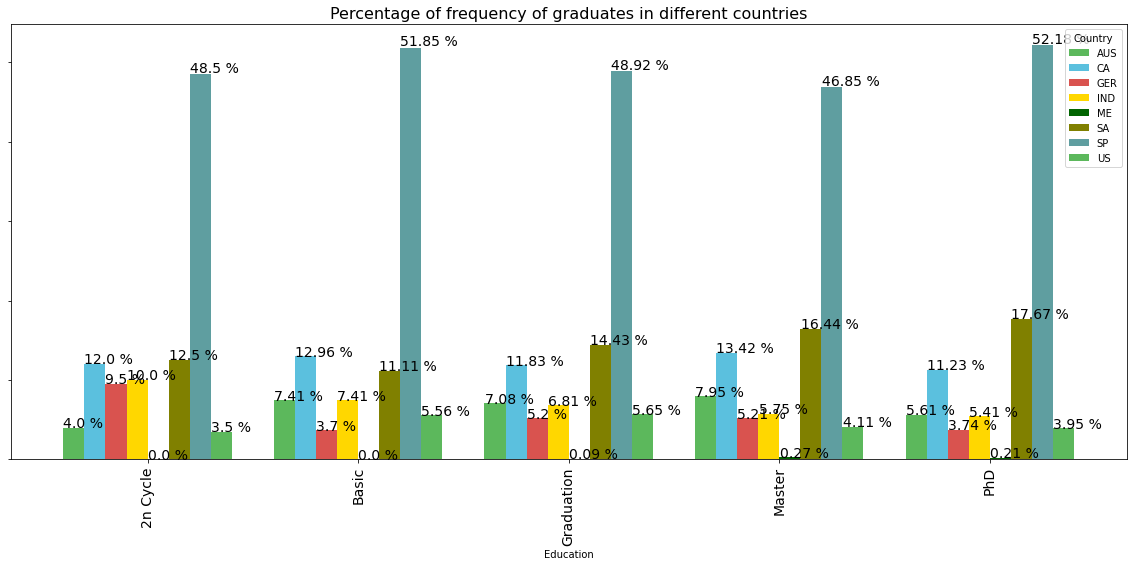

In [ ]:
def cross_country_edu_percentage(df):
    df=df.copy(deep=True)
    country_crosstab_perc=pd.crosstab(df['Education'],df['Country']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(country_crosstab_perc)
    print("*"*70)
    ax = country_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)
    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])


cross_country_edu_percentage(df)

<h3>12.Do a bivariate analysis between ‘Marital_Status’ column and ‘Education’ Column. Plot a bar plot which represents all the Education labels of customers marital_status wise. Which martial_status has the highest percentage of graduates?</h3>


Education       2n Cycle  Basic  Graduation  Master     PhD
Marital_Status                                             
Absurd              0.00   0.00       50.00   50.00    0.00
Alone               0.00   0.00       33.33   33.33   33.33
Divorced            9.91   0.43       51.29   15.95   22.41
Married             9.33   2.33       50.06   16.10   22.17
Single              7.64   3.82       52.23   15.92   20.38
Together            9.77   2.44       49.74   17.80   20.24
Widow               6.58   1.32       46.05   14.47   31.58
YOLO                0.00   0.00        0.00    0.00  100.00
**********************************************************************


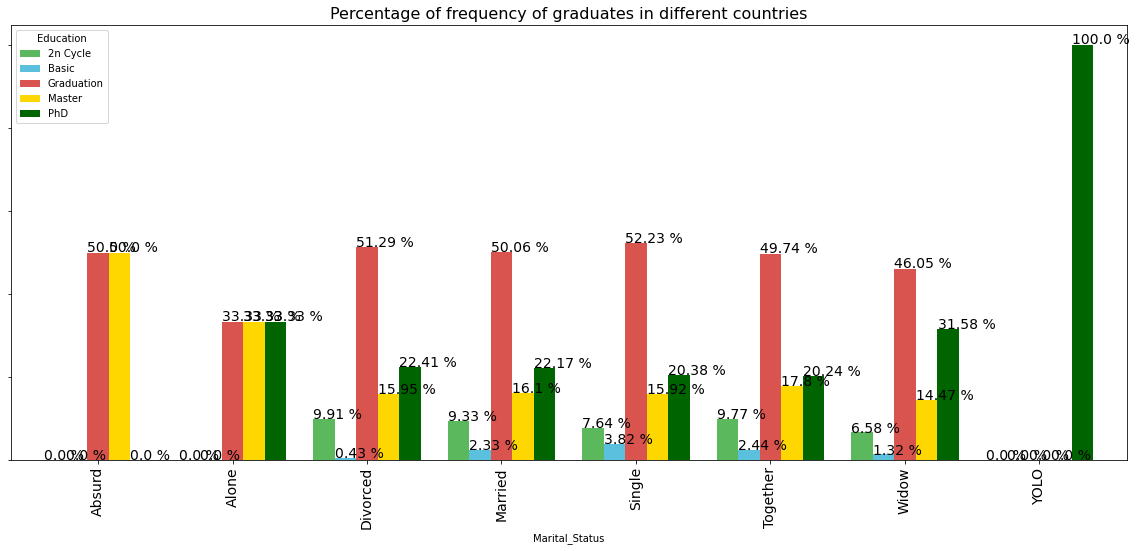

In [ ]:
def cross_mrg_edu_percentage(df):
    df=df.copy(deep=True)
    mar_crosstab_perc=pd.crosstab(df['Marital_Status'],df['Education']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(mar_crosstab_perc)
    print("*"*70)
    ax = mar_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)

    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])
    

cross_mrg_edu_percentage(df)

<h3>13. Plot a percentage segment graph between the ‘‘Marital_Status’ ’ and ‘Education’ of customers.
</h3>

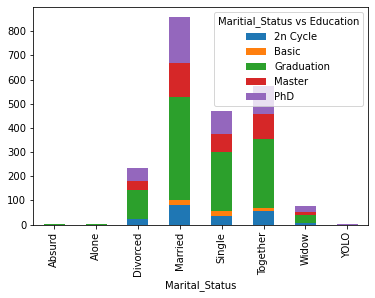

In [ ]:
def cross_bar_graph_maritalstatus_education(df):
    df=df.copy(deep=True)
    pd.crosstab(df['Marital_Status'],df['Education']).plot.bar(stacked=True)
    plt.legend(title='Maritial_Status vs Education')
    plt.show()
    
    
cross_bar_graph_maritalstatus_education(df)

<h3>14.Plot a percentage segment graph between the ‘‘Education” and ‘Country’ of customers.
</h3>

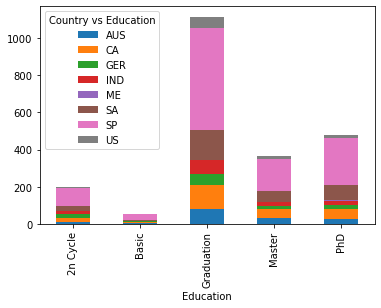

In [ ]:
def cross_bar_graph_education_country(df):
    df=df.copy(deep=True)
    pd.crosstab(df['Education'],df['Country']).plot.bar(stacked=True)
    plt.legend(title='Country vs Education')
    plt.show()

cross_bar_graph_education_country(df)

<h1>Data Preparation & Model Training</h1>

<h3>1. Plot a count-plot of the target variable.</h3>


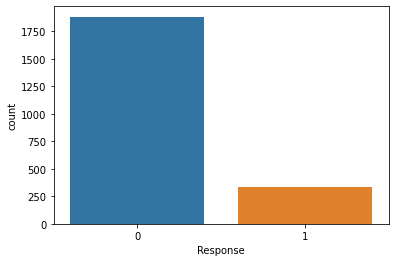

In [ ]:
def plot_target(df):
    df=df.copy(deep=True)
    sns.countplot(df['Response'])

plot_target(df)

- It seems like our target variable is completely imbalance.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2216 non-null int64
Year_Birth             2216 non-null int64
Education              2216 non-null object
Marital_Status         2216 non-null object
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Dt_Customer            2216 non-null object
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3           2216 

- For the time being let's eliminate ID,Year_Birth,Dt_Customer.

In [ ]:
back_up_df=df.copy(deep=True)

<h3>2.Drop 'ID','Year_Birth','Dt_Customer','Country','Education','Marital_Status' columns</h3>

In [ ]:
df.drop(['ID','Year_Birth','Dt_Customer','Country','Education','Marital_Status'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3           2216 non-null int64
AcceptedCmp4           2216 non-null int64
AcceptedCmp5           2216 non-null int64
AcceptedCmp1           2216 non-null int64
AcceptedCmp2           2216 non-null int64
Response               2216 non

In [ ]:
new_df=df.copy(deep=True)

In [ ]:
new_df.shape

(2216, 22)

In [ ]:
new_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,84835.0,0,0,0,189,104,379,111,189,218,...,4,6,1,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,...,3,7,5,0,0,0,0,1,1,0
2,67267.0,0,1,0,134,11,59,15,2,30,...,2,5,2,0,0,0,0,0,0,0
3,32474.0,1,1,0,10,0,1,0,0,0,...,0,2,7,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,...,1,2,7,1,0,0,0,0,1,0


<h3>3.Store the target column(i.e.Response) in the y variable and the rest of the columns in the X variable.</h3>

In [ ]:
y=new_df['Response']
df.drop(['Response'],axis=1,inplace=True)
X=df

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3           2216 non-null int64
AcceptedCmp4           2216 non-null int64
AcceptedCmp5           2216 non-null int64
AcceptedCmp1           2216 non-null int64
AcceptedCmp2           2216 non-null int64
Complain               2216 non

In [ ]:
X.shape,y.shape

((2216, 21), (2216,))

In [ ]:
new_x=X.as_matrix()
new_y=y.as_matrix()
new_y=new_y.reshape(-1,1)

<h3>4.Split the dataset into two parts(i.e. 70% train and 30% test) using random_state=42. 

Train a logistic regression model and print the accuracy_score, classification_report, roc_auc curve for both the train and test set.</h3>

Train Accuracy Score 0.7401676337846551
Test Accuracy Score 0.7112781954887218
************************************************************
Train Classification Report               precision    recall  f1-score   support

           0       0.92      0.76      0.83      1316
           1       0.32      0.63      0.42       235

    accuracy                           0.74      1551
   macro avg       0.62      0.69      0.63      1551
weighted avg       0.83      0.74      0.77      1551

****************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.92      0.73      0.81       567
           1       0.28      0.61      0.38        98

    accuracy                           0.71       665
   macro avg       0.60      0.67      0.60       665
weighted avg       0.82      0.71      0.75       665

************************************************************
Printing ROC CURVE


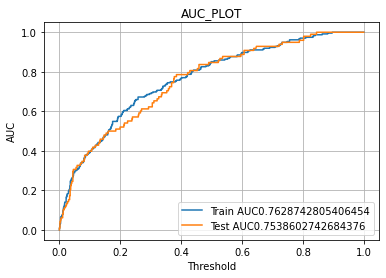

In [ ]:
def model_train_evaluate(new_x,new_y):
    X_train, X_test, y_train, y_test =train_test_split(new_x,new_y,test_size=0.3,random_state=42)
    lr=LogisticRegression(penalty='l2',class_weight='balanced')
    lr.fit(X_train,y_train)
    y_pred_train=lr.predict(X_train)
    y_pred_test=lr.predict(X_test)
    print("Train Accuracy Score",accuracy_score(y_train,y_pred_train))
    print("Test Accuracy Score",accuracy_score(y_test,y_pred_test))
    print("*"*60)
    print("Train Classification Report",classification_report(y_train,y_pred_train))
    print("*"* 40)
    print("Test Classification Report",classification_report(y_test,y_pred_test))
    print("*"*60)
    print("Printing ROC CURVE")
    y_train_pred=lr.predict_proba(X_train)
    y_test_pred=lr.predict_proba(X_test)
    train_fpr,train_tpr,tr_threshold=roc_curve(y_train,y_train_pred[:,1])
    test_fpr,test_tpr,ts_threshold=roc_curve(y_test,y_test_pred[:,1])
    plt.plot(train_fpr,train_tpr,label='Train AUC'+str(auc(train_fpr,train_tpr)))
    plt.plot(test_fpr,test_tpr,label='Test AUC'+str(auc(test_fpr,test_tpr)))
    plt.legend()
    plt.xlabel("Threshold")
    plt.ylabel("AUC")
    plt.title("AUC_PLOT")
    plt.grid()
    plt.show()
    
model_train_evaluate(new_x,new_y)
